# The Lahman Baseball Database - Data Wrangling and Exploration

Matthew Chana - March 25th 2017

### SUMMARY

##### The Lahman Baseball Database
The Lahman Baseball Database is a comprehensive record of batting and pitching statistics from 1871 to 2016. It also contains fielding statistics, standings, team stats, managerial records, post-season data, and a number of other data points.

##### Batting Average vs. General Measures of Success
In this investigation I will focus on a clear measure of performance - career batting average, which is arguably the most important statistic with respect to hitting in baseball. ** *Does career batting average correlate to general notions of success such appearing in an All-Star game, garnering a high salary or winning awards?* ** One would expect so. If it does, perhaps a more unique investigation using a less obvious statistic can be extended from the initial one.

The most relevant tables from The Lahman Baseball Database for the investigation are:

* Regular-season batting statistics (Batting.csv)
* All-Star appearances (AllstarFull.csv)
* Player salary (Salaries.csv)
* Awards received (AwardsPlayers.csv)

##### Players Considered for the Investigation
Batting average in baseball is an excellent measure of performance, but really only for players who are expected to hit at least fairly well. I will discard pitchers for this reason, and I will only consider players with 250 more games in which they have batted.

One interesting note - a player to look out for in many of these tables is Hank Aaron (playerID: aaronha01), who one of the most regarded players in baseball history.

### DATA WRANGLING

##### Create List of Players Considered for the Investigation

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# display all columns for each dataframe
pd.set_option('display.max_columns', None)

# display 6 rows (top 3 and bottom 3) for each dataframe
pd.set_option('display.max_rows', 6)

In [52]:
# funciton to make loading tables easier
def load(data_file):
    return pd.read_csv('supporting-files/baseballdatabank-2017/core/' + data_file)

The Appearances table from the Lahman Baseball Database contains each player's number of appearances, including number of times played in each position and number of games in which the player batted, for each season since 1871. This table will allow for a new table to be created that only includes non-pitchers and players batting 250 or more games.

In [53]:
# load the appearances table
appearances_full = load('Appearances.csv')
appearances_full

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,TRO,NaN,abercda01,1,NaN,1,1,0,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN
1,1871,RC1,NaN,addybo01,25,NaN,25,25,0,0,0,22,0,3,0,0,0,0,NaN,NaN,NaN
2,1871,CL1,NaN,allisar01,29,NaN,29,29,0,0,0,2,0,0,0,29,0,29,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102758,2016,CHN,NL,zobribe01,147,142.0,147,146,0,0,1,119,0,1,27,0,24,46,0.0,4.0,0.0
102759,2016,SEA,AL,zuninmi01,55,48.0,55,52,0,52,0,0,0,0,0,0,0,0,2.0,3.0,0.0
102760,2016,SEA,AL,zychto01,12,0.0,0,12,12,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0


In [54]:
# group and sum to find career appearances for each player based on unique playerID
career_appearances = appearances_full.groupby(appearances_full.playerID).sum()

# drop the yearID column
career_appearances = career_appearances.drop('yearID', axis=1)

career_appearances

,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
playerID,,,,,,,,,,,,,,,,,
aardsda01,331,0.0,139,331,331,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
aaronha01,3298,3173.0,3298,2985,0,0,210,43,7,0,315,308,2174,2760,201.0,122.0,1.0
aaronto01,437,206.0,437,346,0,0,232,7,10,0,135,1,2,137,0.0,102.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuverge01,266,31.0,266,265,265,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0
zwilldu01,366,310.0,366,339,0,0,3,0,0,0,0,334,4,338,0.0,24.0,1.0
zychto01,25,1.0,0,25,25,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0


The Appearances table doesn't define who is to be considered a pitcher, first baseman, left fielder, and so forth. It only records the number of games a player made an apperance. Let's consider a pitcher to be any player who made more than 90% of his appearances as a pitcher.

In [55]:
# function to determine who is NOT a pitcher based on a threshold
def is_not_pitcher(row):
    try: 
        ratio = float(row[4]) / sum(row[4:13])
    except:
        return False
    return ratio < 0.90

In [56]:
# create dataframe of players who are NOT pitchers
not_pitchers = career_appearances[career_appearances.apply(is_not_pitcher, axis=1)]
not_pitchers

,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
playerID,,,,,,,,,,,,,,,,,
aaronha01,3298,3173.0,3298,2985,0,0,210,43,7,0,315,308,2174,2760,201.0,122.0,1.0
aaronto01,437,206.0,437,346,0,0,232,7,10,0,135,1,2,137,0.0,102.0,35.0
abadan01,15,4.0,15,9,0,0,8,0,0,0,0,0,1,1,0.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zupofr01,16,1.0,16,13,0,13,0,0,0,0,0,0,0,0,0.0,5.0,0.0
zuvelpa01,209,138.0,209,197,0,0,0,55,14,133,0,0,0,0,3.0,14.0,9.0
zwilldu01,366,310.0,366,339,0,0,3,0,0,0,0,334,4,338,0.0,24.0,1.0


In [57]:
# narrow down to players batting 250 or more career games
players = not_pitchers[not_pitchers['G_batting'] > 250]
players

,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
playerID,,,,,,,,,,,,,,,,,
aaronha01,3298,3173.0,3298,2985,0,0,210,43,7,0,315,308,2174,2760,201.0,122.0,1.0
aaronto01,437,206.0,437,346,0,0,232,7,10,0,135,1,2,137,0.0,102.0,35.0
abbated01,855,NaN,855,855,0,0,0,419,20,388,0,2,1,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuninmi01,350,323.0,350,344,0,344,0,0,0,0,0,0,0,0,3.0,7.0,1.0
zupcibo01,319,198.0,319,285,0,0,1,0,2,0,100,112,96,282,11.0,25.0,34.0
zwilldu01,366,310.0,366,339,0,0,3,0,0,0,0,334,4,338,0.0,24.0,1.0


In [58]:
# create a list of players who are NOT pitchers and who have batted 250 or more games
players_list = list(players.index)
# players_list

We stared off with {{len(career_appearances)}} unique players who's appearances were recorded in the Appearances table. We are left with {{len(list(players.index))}} players who are NOT pitchers and who have batted more than 250 times.

##### Prepare Relevant Dataframes for Analysis

##### Regular-season batting statistics (Batting.csv):
Batting statistics have been recorded since...

In [59]:
# load original batting table
batting = load('Batting.csv')

# group by playerID and sum to find career statistics for each player 
batting_career = batting.groupby(batting.playerID).sum()

# drop the yearID column
batting_career = batting_career.drop('yearID',axis=1)

# calculate career batting average
batting_career['lifetime_BA'] = round((batting_career['H']/batting_career['AB']),4)

# remove players who never batted (NaN)
batting_career.dropna(subset=['lifetime_BA'], inplace=True)

batting_career

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,lifetime_BA
playerID,,,,,,,,,,,,,,,,,,,
aardsda01,9,331,4,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0000
aaronha01,23,3298,12364,2174,3771,624,98,755,2297.0,240.0,73.0,1402,1383.0,293.0,32.0,21.0,121.0,328.0,0.3050
aaronto01,7,437,944,102,216,42,6,13,94.0,9.0,8.0,86,145.0,3.0,0.0,9.0,6.0,36.0,0.2288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuvelpa01,9,209,491,41,109,17,2,2,20.0,2.0,0.0,34,50.0,1.0,2.0,18.0,0.0,8.0,0.2220
zuverge01,12,266,142,5,21,2,1,0,7.0,0.0,1.0,9,39.0,0.0,0.0,16.0,0.0,3.0,0.1479
zwilldu01,4,366,1280,167,364,76,15,30,202.0,46.0,NaN,128,139.0,NaN,4.0,31.0,NaN,NaN,0.2844


There are {{len(batting_career.index)}} unique players who's career batting statistics we are left with after removing any players who never batted. Players who are are pitchers or who have batted less than 250 times still need to be removed.

In [60]:
# function returns True if a playerID from any given dataframe is in the players_list
def remove_from_df(id):
    return id in players_list

In [61]:
# remove any player who is NOT in the players_list
batting_career = batting_career[batting_career.index.map(remove_from_df)]

batting_career

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,lifetime_BA
playerID,,,,,,,,,,,,,,,,,,,
aaronha01,23,3298,12364,2174,3771,624,98,755,2297.0,240.0,73.0,1402,1383.0,293.0,32.0,21.0,121.0,328.0,0.3050
aaronto01,7,437,944,102,216,42,6,13,94.0,9.0,8.0,86,145.0,3.0,0.0,9.0,6.0,36.0,0.2288
abbated01,11,855,3044,355,772,99,43,11,324.0,142.0,NaN,289,16.0,NaN,33.0,93.0,NaN,NaN,0.2536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuninmi01,4,350,1125,117,219,43,2,50,133.0,1.0,4.0,75,404.0,1.0,31.0,8.0,8.0,23.0,0.1947
zupcibo01,6,319,795,99,199,47,4,7,80.0,7.0,5.0,57,137.0,3.0,6.0,20.0,8.0,15.0,0.2503
zwilldu01,4,366,1280,167,364,76,15,30,202.0,46.0,NaN,128,139.0,NaN,4.0,31.0,NaN,NaN,0.2844


There are now {{len(batting_career)}} players who are not pitchers and who have batted more than 250 games who's career Regular-season batting statistics we can use for the investigation.

##### All-Star appearances (AllstarFull.csv):
What is an appropriate measure of All-Star appearances other than just calculating the total number of times a player was sent to the All-Star game? One method may simply be to find the ratio of the number of All-Star appearances to the number of years a player played. To find this I will first use the Master table (Master.csv) from the Lahman Baseball Database to compute the number of years in each player career.

In [62]:
# load master table
master = load('Master.csv')

# COMPUTE NUMBER OF YEARS PLAYED
# convert debut and finalGame columns to timestamps
master['debut'] = pd.to_datetime(master['debut'])
master['finalGame'] = pd.to_datetime(master['finalGame'])

# some rows don't have data - remove them
master.dropna(subset=['debut'], inplace=True)
master.dropna(subset=['finalGame'], inplace=True)

# calculate and add column for difference between debut and final game played
master['career-years'] =  master['finalGame'] - master['debut']

# converts days to years
master['career-years'] = master['career-years'].apply(lambda x: x.days / 365)

# group by playerID
master = master.groupby(master.playerID).first()

# remove any row with player career less than 2 years
# master = master[master['career-years'] > 2]

master

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,career-years
playerID,,,,,,,,,,,,,,,,,,,,,,,,,
aardsda01,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,11.386301
aaronha01,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,22.490411
aaronto01,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,9.468493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuverge01,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,USA,AZ,Tempe,George,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01,8.156164
zwilldu01,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,USA,CA,La Crescenta,Dutch,Zwilling,Edward Harrison,160.0,66.0,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01,5.915068
zychto01,zychto01,1990.0,8.0,7.0,USA,IL,Monee,NaN,NaN,NaN,NaN,NaN,NaN,Tony,Zych,Anthony Aaron,190.0,75.0,R,R,2015-09-04,2016-08-24,zycht001,zychto01,0.972603


Now the number of years played for each player can be used to find the ratio of all-star games played.

In [63]:
# load original all-star appearances table
all_star = load('AllstarFull.csv')

# count number of times player was sent to all-star game(s)
all_star['sent_to_AS'] = 1

# group by playerID and compute career all-star appearances
all_star_career = all_star.groupby(all_star.playerID).sum()

# drop unecessary columns (yearID, gameNum and startingPos)
all_star_career = all_star_career.drop(['yearID','gameNum','startingPos'],axis=1)

# concatenate this dataframe with career-years from master dataframe
all_star_career = pd.concat([all_star_career, master['career-years']], axis=1)

# remove any row with NaN for sent_to_AS (player never went to All-Star game)
all_star_career.dropna(subset=['sent_to_AS'], inplace=True)

# calculate all-star appearances average
all_star_career['avg-all-star'] = all_star_career['sent_to_AS'] / all_star_career['career-years']

# remove any row with NaN for average
# all_star_career.dropna(subset=['avg-all-star'], inplace=True)

# remove any player who is NOT in the players_list
all_star_career = all_star_career[all_star_career.index.map(remove_from_df)]

all_star_career

,GP,sent_to_AS,career-years,avg-all-star
aaronha01,24.0,25.0,22.490411,1.111585
abreubo01,2.0,2.0,18.084932,0.110589
abreujo02,1.0,1.0,2.509589,0.398472
...,...,...,...,...
zimmery01,1.0,1.0,11.093151,0.090146
ziskri01,2.0,2.0,12.043836,0.166060
zobribe01,2.0,3.0,10.178082,0.294751


There are now {{len(all_star_career)}} players who are not pitchers and who have batted more than 250 games who's career career average for All-Star appearances we can use for the investigation. Note, a player's career average All-Star appearances may be greater than 1 for players (Hank Aaron for example). This is because at periods in the 50's and 60's [more than one all star game was played](http://www.nytimes.com/2008/07/15/sports/baseball/15sandomir.html) more than one All-Star game may have been played.

##### Player salary (Salaries.csv):
A player's salary in 1985 dollars is not what it would be in 2016 dollars, so I've adjusted for inflation using the [United States Bureau of Labor Statistics' Consumer Price Index](https://www.bls.gov/data/) historical data (each year adjusted independently and then the average taken of all a player's salaries over the course of a baseball career). Each salary was adjusted to the 2016 annual average (2017 doesn't yet have a year-end average. I then average the salary across a player's career.

In [64]:
# load the salaries and cpi dataframes
salaries = load('Salaries.csv')
cpi = load('consumer_price_index.csv')

# function queries the cpi dataframe to find a value corresponding to the year x
def cpi_val(x):
    return float(cpi.loc[cpi['Year'] == x, 'Annual-Avg'].values[0])

# computes/creates new column for avergage adjusted salary
salaries['avg-adjusted'] = (240.007 * salaries['salary']) / salaries['yearID'].apply(cpi_val)

# supress scientific notation in the dataframe
pd.set_option('display.float_format', lambda x: '%.0f' % x)

# COMPUTE AVERAGE SALARY OVER THE COURSE OF A PLAYER'S CAREER
# group by playerID and find the average
salaries_career = salaries.groupby(salaries.playerID).mean()
# drop yearID column
salaries_career = salaries_career.drop('yearID', axis=1)
# rename column to 'avg-salar-adj'
salaries_career.columns = ['avg-salary', 'avg-salary-adj']

# remove any player who is NOT in the players_list
salaries_career = salaries_career[salaries_career.index.map(remove_from_df)]

salaries_career

,avg-salary,avg-salary-adj
playerID,,
abbotku01,470778,686487
abnersh01,144700,259552
abreubo01,7773729,9231062
...,...,...
zobribe01,4169510,4278451
zuninmi01,513800,520585
zupcibo01,143667,243803


There are now {{len(salaries_career)}} players who are not pitchers and who have batted more than 250 games who's career career average for All-Star appearances we can use for the investigation. 

##### Awards received (AwardsPlayers.csv):
Similarly to the All-Star apperances table, the average awards received per year as a ratio between the number of awards received and the number of years a player played will be calcualted here.

In [65]:
# load original awards dataframe
awards_players = load('AwardsPlayers.csv')

# tally up total awards
awards_players['awarded'] = 1

# group by awards received over course of career
awards_players_career = awards_players.groupby(awards_players.playerID).sum()

# drop yearID
awards_players_career = awards_players_career.drop('yearID', axis=1)

# COMPUTE THE AVERAGE NUMBER OF AWARDS WON OVER THE COURSE OF A PLAYER'S CAREER
# concatenate this dataframe with career-years from master dataframe
awards_players_career = pd.concat([awards_players_career, master['career-years']], axis=1)

# undo supress scientific notation
pd.set_option('display.float_format', None)

# remove any row with NaN (artifact of concatenating)
awards_players_career.dropna(inplace=True)

# calculate all-star appearances average
awards_players_career['avg-awards'] = awards_players_career['awarded'] / awards_players_career['career-years']

# remove any player who is NOT in the players_list
awards_players_career = awards_players_career[awards_players_career.index.map(remove_from_df)]

awards_players_career

,awarded,career-years,avg-awards
aaronha01,16.0,22.490411,0.711414
abreubo01,2.0,18.084932,0.110589
abreujo02,2.0,2.509589,0.796943
...,...,...,...
zimmery01,4.0,11.093151,0.360583
ziskri01,2.0,12.043836,0.166060
zobribe01,1.0,10.178082,0.098250


There are now {{len(awards_players_career)}} players who are not pitchers and who have batted more than 250 games who's career career average for All-Star appearances we can use for the investigation. 

### DATA EXPLORATION

I'm going to mainly be looking for correlations between career batting average and three variables measuring success - awards received, All-Star appearances and salary.

##### Lifetime batting average vs. average awards received:

In [66]:
# create a new dataframe containing the two sets to plot
awards_ba = pd.concat([awards_players_career, batting_career['lifetime_BA']], axis=1)
awards_ba.dropna(inplace=True)
awards_ba

,awarded,career-years,avg-awards,lifetime_BA
aaronha01,16.0,22.490411,0.711414,0.3050
abreubo01,2.0,18.084932,0.110589,0.2913
abreujo02,2.0,2.509589,0.796943,0.2995
...,...,...,...,...
zimmery01,4.0,11.093151,0.360583,0.2779
ziskri01,2.0,12.043836,0.166060,0.2871
zobribe01,1.0,10.178082,0.098250,0.2659


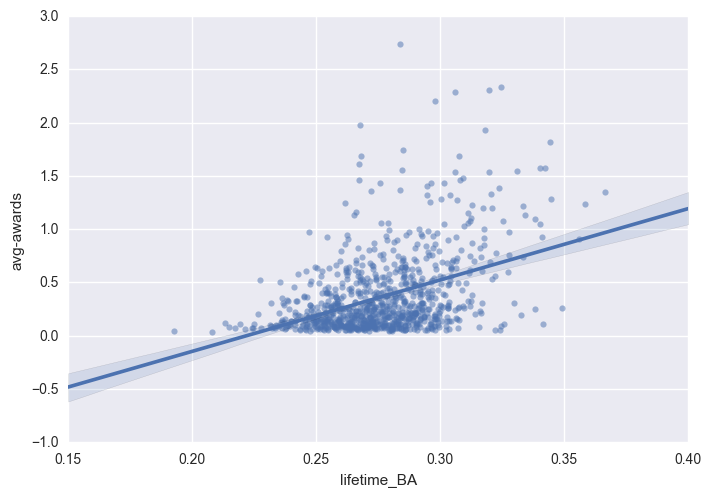

In [67]:
ax = sns.regplot(x='lifetime_BA', y='avg-awards', data=awards_ba, scatter_kws={'alpha':0.5})
plt.show()

The scatter plot with regression line plotted appear to show a correlation between lifetime batting average and average awards received over the course of a player's career, as expected. But what is the correlation quantified?

In [68]:
# pearson's r for ba vs. awards
awards_ba[['lifetime_BA','avg-awards']].corr()

,lifetime_BA,avg-awards
lifetime_BA,1.000000,0.420179
avg-awards,0.420179,1.000000


A Pearson's correlation score of approximately 0.42 reveals a moderate positive correlation between the variables.

##### Lifetime batting average vs. average All-Star appearances:

In [69]:
# create a new dataframe containing the two sets to plot
all_star_ba = pd.concat([all_star_career, batting_career['lifetime_BA']], axis=1)
all_star_ba.dropna(inplace=True)
all_star_ba

,GP,sent_to_AS,career-years,avg-all-star,lifetime_BA
aaronha01,24.0,25.0,22.490411,1.111585,0.3050
abreubo01,2.0,2.0,18.084932,0.110589,0.2913
abreujo02,1.0,1.0,2.509589,0.398472,0.2995
...,...,...,...,...,...
zimmery01,1.0,1.0,11.093151,0.090146,0.2779
ziskri01,2.0,2.0,12.043836,0.166060,0.2871
zobribe01,2.0,3.0,10.178082,0.294751,0.2659


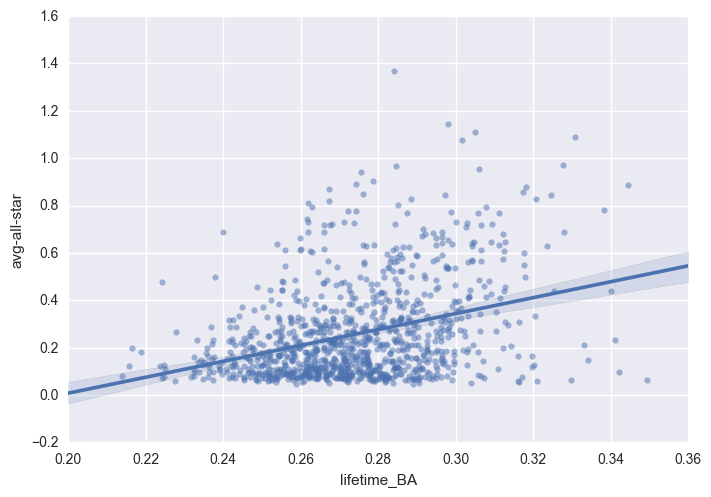

In [70]:
ax = sns.regplot(x='lifetime_BA', y='avg-all-star', data=all_star_ba, scatter_kws={'alpha':0.5})
plt.show()

Again, as expected a correlation between lifetime batting average and the average All-Star appearances for a given player.

In [71]:
all_star_ba[['lifetime_BA','avg-all-star']].corr()

,lifetime_BA,avg-all-star
lifetime_BA,1.000000,0.347765
avg-all-star,0.347765,1.000000


It's on the lower end of a moderate positive correlation but it's there.

##### Lifetime batting average vs. career average salary:

In [72]:
# create a new dataframe containing the two sets to plot
salary_ba = pd.concat([salaries_career, batting_career['lifetime_BA']], axis=1)
salary_ba.dropna(inplace=True)
salary_ba

,avg-salary,avg-salary-adj,lifetime_BA
abbotku01,4.707778e+05,6.864872e+05,0.2559
abnersh01,1.447000e+05,2.595522e+05,0.2274
abreubo01,7.773729e+06,9.231062e+06,0.2913
...,...,...,...
zobribe01,4.169510e+06,4.278451e+06,0.2659
zuninmi01,5.138000e+05,5.205846e+05,0.1947
zupcibo01,1.436667e+05,2.438034e+05,0.2503


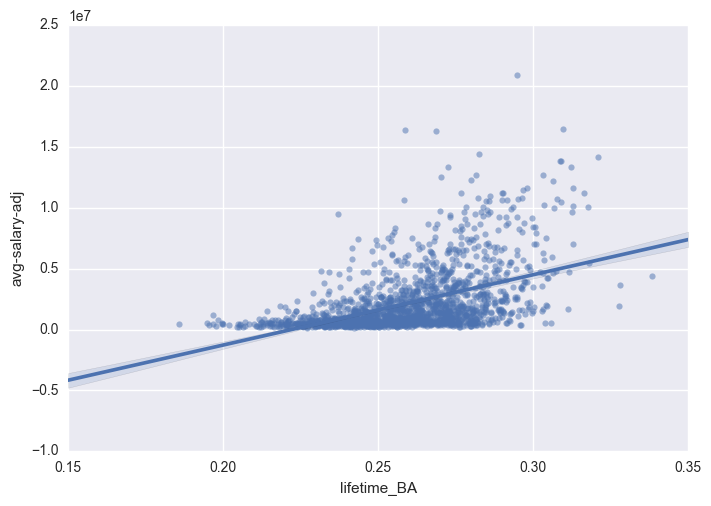

In [73]:
ax = sns.regplot(x='lifetime_BA', y='avg-salary-adj', data=salary_ba, scatter_kws={'alpha':0.5})
plt.show()

This seems like a slightly more obvious correlation in which career average salary rises as batting average rises.

In [74]:
salary_ba[['lifetime_BA','avg-salary-adj']].corr()

,lifetime_BA,avg-salary-adj
lifetime_BA,1.000000,0.493643
avg-salary-adj,0.493643,1.000000


Pearson's correlation here is a solid moderate.

### ALTERNATE INVESTIGATION
What about a more obscure statistic relating to a player's performance other than lifetime batting average? One thing that interests me is how 'adaptable' a player is in field positions. For example, a player may be a catcher at one point in his career and then switch to being a second baseman. Or perhaps a player alternates betwen second and thrid base throughout the season. Looking at the below 'players' table (for example playerID abbated01) reveals that this does happen.  

In [ ]:
players

##### Calculate player adaptability score:
For each player's set of appearances, I will create a 'player adaptability score' which is calculated by looking at the possible field-positions in baseball (again excluding pitchers). 

For each player's total appearances, it is three minus the standard deviation (unbiased estimator, s-hat) divided by the mean.

$$\text{Player Position Adaptability } = 3-\frac{\hat{s}}{\mu}$$

In [ ]:
# create player position adaptability score
# positions = ['G_p','G_c','G_1b','G_2b','G_3b','G_ss','G_lf','G_cf','G_rf']
positions = ['G_c','G_1b','G_2b','G_3b','G_ss','G_lf','G_cf','G_rf']
players['adapt_score'] = 3 - round((players[positions].std(axis=1, ddof=1)/players[positions].mean(axis=1)),4)
players

Now it seems appropriate to plot adaptability score against our three measures of success.

##### Player adaptability score vs. awards received:

In [ ]:
awards_as = pd.concat([awards_players_career, players['adapt_score']], axis=1)
awards_as.dropna(inplace=True)
awards_as

In [ ]:
ax = sns.regplot(x='adapt_score', y='avg-awards', data=awards_as, scatter_kws={'alpha':0.5})
plt.show()

In [ ]:
awards_as[['adapt_score','avg-awards']].corr()

There is a weak negative correlation between player adaptability score and average awars received.

##### Player adaptability score vs. All-Star appearacnes:

In [ ]:
all_star_as = pd.concat([all_star_career, players['adapt_score']], axis=1)
all_star_as.dropna(inplace=True)
all_star_as

In [ ]:
ax = sns.regplot(x='adapt_score', y='avg-all-star', data=all_star_as, scatter_kws={'alpha':0.5})
plt.show()

In [ ]:
all_star_as[['adapt_score','avg-all-star']].corr()

A slightly more negative correlation between player adaptability score and average All-Star apperances.

##### Player adaptability score vs. career salary average:

In [ ]:
salary_as = pd.concat([salaries_career, players['adapt_score']], axis=1)
salary_as.dropna(inplace=True)
salary_as

In [ ]:
ax = sns.regplot(x='adapt_score', y='avg-salary-adj', data=salary_as, scatter_kws={'alpha':0.5})
plt.show()

In [ ]:
salary_as[['adapt_score','avg-salary-adj']].corr()

Yet an even stronger, but still weak, negative correlation between player adaptabiltiy and average salary.

# junk code below - disregard

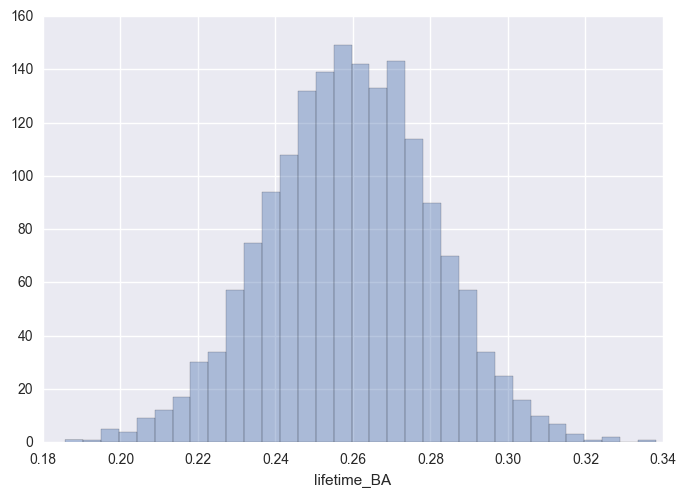

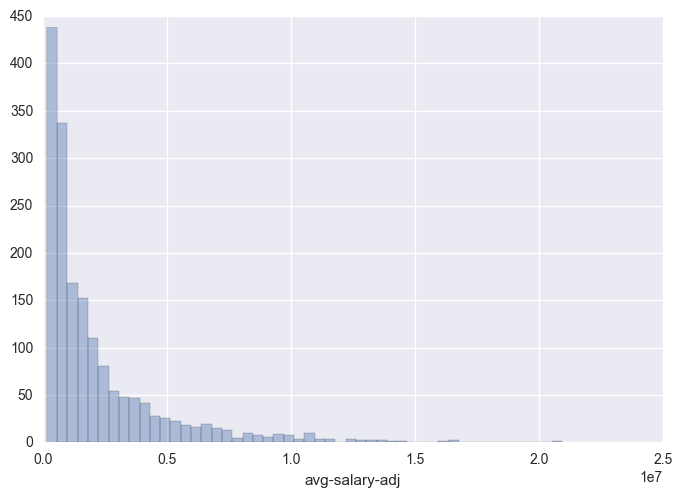

In [81]:
# test hist
lifetime_ba = salary_ba['lifetime_BA']
avg_salary_adj = salary_ba['avg-salary-adj']

fig, ax = plt.subplots()
fig, ax2 = plt.subplots()

sns.distplot(lifetime_ba, ax=ax, kde=False)
sns.distplot(avg_salary_adj, ax=ax2, kde=False)
plt.show()

In [ ]:
# remove anyone with less than 25 games
def more_x_games(row):
    sum_games = sum(row[4:13])
    return sum_games > 249

In [ ]:
# remove anyone with less than 25 games
players = not_pitchers[not_pitchers.apply(more_x_games, axis=1)]
players

In [ ]:
# calculate career homerun average
batting_career['lifetime_HR'] = round(batting_career['HR']/batting_career['AB'],4)

##### Batting-Post

In [ ]:
# load original post-season batting table
batting_post = load('BattingPost.csv')

# group by playerID and sum to find career post-season statistics for each player
batting_post_career = batting_post.groupby(batting_post.playerID).sum()

# drop yearID field
batting_post_career = batting_post_career.drop('yearID',axis=1)

# calculate lifetime batting average
batting_post_career['lifetime_post_BA'] = round((batting_post_career['H']/batting_post_career['AB']),4)

# remove players who never batted (NaN)
batting_post_career.dropna(subset=['lifetime_post_BA'], inplace=True)

# remove players with fewer than 25 At-Bats
batting_post_career = batting_post_career[batting_post_career['AB'] > 25]

# fill NaN fields with 0 WHY need this?
# batting_post_career.fillna(value=0, inplace=True)

# remove anyone from dataframe who is a pitcher or has played less than 25 games
batting_post_career = batting_post_career[batting_post_career.index.map(remove_from_df)]

batting_post_career

# LOOK FOR CORRELATIONS - HOMERUNS

In [ ]:
awards_hr = pd.concat([awards_players_career, batting_career['lifetime_HR']], axis=1)
awards_hr.dropna(inplace=True)
awards_hr

In [ ]:
ax = sns.regplot(x='lifetime_HR', y='avg-awards', data=awards_hr, scatter_kws={'alpha':0.5})

plt.show()

In [ ]:
awards_hr[['lifetime_HR','avg-awards']].corr()

In [ ]:
all_star_hr = pd.concat([all_star_career, batting_career['lifetime_HR']], axis=1)
all_star_hr.dropna(inplace=True)
all_star_hr

In [ ]:
ax = sns.regplot(x='lifetime_HR', y='avg-all-star', data=all_star_hr, scatter_kws={'alpha':0.5})
plt.show()

In [ ]:
all_star_hr[['lifetime_HR','avg-all-star']].corr()

In [ ]:
salary_hr = pd.concat([salaries_career, batting_career['lifetime_HR']], axis=1)

salary_hr.dropna(inplace=True)

salary_hr

In [ ]:
ax = sns.regplot(x='lifetime_HR', y='avg-salary-adj', data=salary_hr, scatter_kws={'alpha':0.5})
plt.show()

In [ ]:
salary_hr[['lifetime_HR','avg-salary-adj']].corr()

In [ ]:
# test plot
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set()
# cols = ['H','HR','RBI','GP','awarded']
# sns.pairplot(main_df[cols], size=2.5)
# plt.show()